# Summary
We analysed the CircleUp dataset with python3 libraries *Pandas*, *Numpy*, *Scipy*, *Matplotlib*, *Seeborn* and *Scikit-learn*. Data have been locally downloaded in .csv files format and imported in Pandas data frames to be manipulated.

## Question 1 
To find the solutions we used the `user_message dataset`.

 - ### Point 1:
The list of users that added more than 500 pieces of content is the following: 

User ID | Number of Content 
--- | ---
9484 | 1163	
9676 | 722	
12116 | 688	
3924 |	686	
2052 |640	
10878 | 601	
5999 |	566	
8962 |	551	
11578 |544	
2434 |	526	
17616 | 526	
3532 |	523	
10530 | 521	
11271 | 503	

Details of the analysis are [here](#Ranking-of-best-users-based-on-numbers-of-content-created).

 - ### Point 2:
In order to find which users grew more rapidly in the last year, we need a measure of how fast they incremented the customer engagment in a given period.
Such measurement can be obtained from a linear regression of the variable `total_engagement` versus the `content_created_date`. Then our metric (`growing_rate`), is rapresented by the slope of the fitted line. The bigger the slope, the faster the customer engagment growing.
Finally, ranking the users based on this metric we found the top 10 fastest growing users:

user_id	| growing_rate	
--- | ---
3924 |	115.35
2052 |	91.11
4527 |	17.67
9484 | 9.31
12116 | 6.52
9770 | 4.33
3063 | 4.22
7215 |	3.61
5833 | 3.00
4711 |	2.73

[Here](#Fastest-Growing-users) the details of the analysis, and more considerations about the manipulation of the variable `content_created_date`. 

As last check, we added also some [visualization](#Visualization-of-Growing-rate) of our `Growing rate` metric.

## Question 2

To answer the second question of the assignment, we build a supervised learning models using the `user`, `user_features` and `model_test_file` dataset. 
In order to predict the two classes of `response` outcome, we built and compared the performances of two different learning algorithms: **Support Vector Machine** and **Random Forest**. 

As first, we performed an exploratory data analysis ([EDA](#Exploratory-Data-Analysis)) to better understand features properties and behaviour. We applyied some features transformation as: eliminating isolated extreme values, taking logaritmic values and rescaling in order to understand possible correlations among features, and to put them in a better shape for feeding the model training.

We decided to train the classification models excluding few of the features inside the `user_features` dataset. 
We observed that the performance of the **SVM** learning algorithm is better than the **Random Forest**, 
especially in predicting the less represented _class_ (`response` equal to 1). 
Details and results of the analysis are [here.](#Learning-Models).

Looking for better results, we also used the complete list of features, conveniently transformed (see [here](#Data-Cleaning-and-Features-Transformation)), to train the **SVM** model, but the [results](#Training-SVM-model-after-data-cleaning) are completely comparable.]

Finally we predicted the `response` for the users in the `model_test_file`, using the **SVM** model trained with the subset of features. [Here](#New-data-classification-with-SVM-algorithm) the results.

## Ranking of best users based on numbers of content created

In [3]:
# Import libraries
import numpy as np
impo# Import dataset in Pandas data frame
message_data = pd.read_csv('data/user_message.csv')
message_data.head()rt pandas as pd

In [4]:
# Import dataset in Pandas data frame
message_data = pd.read_csv('data/user_message.csv')
message_data.head()

,user_id,content_created_date,content_count,total_engagement
0,20,1/1/2015,1,52
1,20,1/2/2015,1,72
2,20,1/10/2015,1,83
3,20,1/12/2015,1,45
4,20,1/16/2015,1,102


In [5]:
# Sum over content_count by user
df_by_user = message_data.groupby('user_id').sum()

In [6]:
# Select and Sort
df = df_by_user[(df_by_user['content_count']>500)]
df.sort_values(by='content_count', ascending=False)

,content_count,total_engagement
user_id,,
9484,1163,954382
9676,722,204249
12116,688,1243620
3924,686,16661950
2052,640,22826604
10878,601,194024
5999,566,373659
8962,551,53325
11578,544,90666


## Fastest Growing users

In order to find the faster growing user, first of all, we need to reshape and trasform our dataset.
First step is to convert the variable `content_created_date` from _string_ to _date_. Then, we transform each _date_ in the corresponding _number of days since '2015-01-01'_. 

In [7]:
# Convert strings of date in a date object
message_data['content_created_date'] = pd.to_datetime(message_data['content_created_date'], format="%m/%d/%Y")
message_data.head()

,user_id,content_created_date,content_count,total_engagement
0,20,2015-01-01,1,52
1,20,2015-01-02,1,72
2,20,2015-01-10,1,83
3,20,2015-01-12,1,45
4,20,2015-01-16,1,102


In [ ]:
# Select only needed variables
df = message_data[['user_id', 'content_created_date', 'total_engagement']]

In [8]:
# convert date in day_since to be able to apply regression
df['days_since'] = (df.content_created_date - pd.to_datetime('2015-01-01') ).astype('timedelta64[D]')
df.head()

,user_id,content_created_date,total_engagement,days_since
0,20,2015-01-01,52,0.0
1,20,2015-01-02,72,1.0
2,20,2015-01-10,83,9.0
3,20,2015-01-12,45,11.0
4,20,2015-01-16,102,15.0


To perform the linear regression with `stats.linregress`, we need to have for each user a list of `days_since`, and a list of `total_engagement` that correspond to our _x_ and _y_ variables. 

In [11]:
# reshape df to have a list of 'days_since' for each user
dfreshaped_x = df.groupby('user_id')['days_since'].apply(list)
dfreshaped_x.head()

user_id
20      [0.0, 1.0, 9.0, 11.0, 15.0, 21.0, 23.0, 25.0, ...
134     [28.0, 29.0, 32.0, 37.0, 62.0, 63.0, 64.0, 65....
635     [120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126...
950     [4.0, 49.0, 55.0, 56.0, 60.0, 61.0, 67.0, 75.0...
1034    [4.0, 11.0, 12.0, 13.0, 18.0, 20.0, 25.0, 41.0...
Name: days_since, dtype: object

In [12]:
# reshape df to have a list of 'total_engagement' for each user
dfreshaped_y = df.groupby('user_id')['total_engagement'].apply(list)
dfreshaped_y.head()

user_id
20      [52, 72, 83, 45, 102, 35, 92, 33, 39, 109, 54,...
134     [68, 44, 12, 13, 18, 69, 121, 23, 61, 34, 22, ...
635     [67, 37, 20, 36, 20, 7, 16, 25, 15, 4, 7, 14, ...
950     [18, 20, 8, 13, 6, 16, 8, 14, 12, 15, 15, 8, 1...
1034    [22, 28, 18, 12, 29, 26, 45, 50, 29, 29, 33, 2...
Name: total_engagement, dtype: object

In [16]:
# Reshape data to have it in a useful format
data = {'days_since':dfreshaped_x, 'total_engagement':dfreshaped_y}
day_eng_list_df = pd.DataFrame(data)
day_eng_list_df.head()

,days_since,total_engagement
user_id,,
20,"[0.0, 1.0, 9.0, 11.0, 15.0, 21.0, 23.0, 25.0, ...","[52, 72, 83, 45, 102, 35, 92, 33, 39, 109, 54,..."
134,"[28.0, 29.0, 32.0, 37.0, 62.0, 63.0, 64.0, 65....","[68, 44, 12, 13, 18, 69, 121, 23, 61, 34, 22, ..."
635,"[120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126...","[67, 37, 20, 36, 20, 7, 16, 25, 15, 4, 7, 14, ..."
950,"[4.0, 49.0, 55.0, 56.0, 60.0, 61.0, 67.0, 75.0...","[18, 20, 8, 13, 6, 16, 8, 14, 12, 15, 15, 8, 1..."
1034,"[4.0, 11.0, 12.0, 13.0, 18.0, 20.0, 25.0, 41.0...","[22, 28, 18, 12, 29, 26, 45, 50, 29, 29, 33, 2..."


Another important analysis step is to check how many points (`days_since`, `total_engagement`) there are for each users. Because too few points could affect the quality of the linear regression fit resulting in an innacurate _slope_ calculation.
We choosed to exclude users with less than 10 entries in the data frame.

In [22]:
# sanity check on the lenght of the lists in order to have a meaning regression points
day_eng_list_df['counts'] = day_eng_list_df['days_since'].apply(len)
day_eng_list_df.head()

,days_since,total_engagement,counts
user_id,,,
20,"[0.0, 1.0, 9.0, 11.0, 15.0, 21.0, 23.0, 25.0, ...","[52, 72, 83, 45, 102, 35, 92, 33, 39, 109, 54,...",84
134,"[28.0, 29.0, 32.0, 37.0, 62.0, 63.0, 64.0, 65....","[68, 44, 12, 13, 18, 69, 121, 23, 61, 34, 22, ...",55
635,"[120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126...","[67, 37, 20, 36, 20, 7, 16, 25, 15, 4, 7, 14, ...",126
950,"[4.0, 49.0, 55.0, 56.0, 60.0, 61.0, 67.0, 75.0...","[18, 20, 8, 13, 6, 16, 8, 14, 12, 15, 15, 8, 1...",113
1034,"[4.0, 11.0, 12.0, 13.0, 18.0, 20.0, 25.0, 41.0...","[22, 28, 18, 12, 29, 26, 45, 50, 29, 29, 33, 2...",73


In [23]:
# Remove users with less than 10 entrie per list of days_since and total_engagement
cut_df = day_eng_list_df[day_eng_list_df['counts']>10]

Now, we define a function that performs the regression using `stats.linregress`, and returns the slope of the regression line.

In [25]:
# Function definition
from scipy import stats

def linreg(row):
    slope, intercept, r_value, p_value, std_err = stats.linregress(row['days_since'], row['total_engagement'])
    return slope

Finally, we apply our `linreg` function to the reshaped data frame, and add a new column with the _slope_ of the regression line. This new parameter is the the `growing_rate` metric that we could use to find the faster growing users.

In [29]:
# Apply linreg function to cut_df data frame 
cut_df['growing_rate'] = cut_df.apply(linreg, axis=1)

C:\Users\Michela\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


The final answer to point 2 of Question 1 is the following table of the 10 users with the higher `growing rate`.

In [63]:
# Sort and select first 10 users
sorted_df = cut_df.sort_values('growing_rate', ascending=False)
sorted_df[:10]

,days_since,total_engagement,counts,growing_rate
user_id,,,,
3924,"[0.0, 1.0, 2.0, 4.0, 6.0, 7.0, 8.0, 10.0, 13.0...","[21991, 56394, 26564, 17767, 36185, 21713, 236...",318,115.351638
2052,"[0.0, 1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 9.0, 11.0,...","[17273, 16608, 25792, 31585, 211897, 296452, 1...",298,91.111386
4527,"[0.0, 1.0, 6.0, 11.0, 16.0, 20.0, 23.0, 26.0, ...","[274, 471, 308, 327, 362, 560, 374, 352, 295, ...",119,17.673102
9484,"[109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115...","[2039, 2994, 3229, 5582, 5287, 4302, 2554, 350...",198,9.315306
12116,"[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13...","[1490, 4267, 5118, 907, 2507, 1038, 5417, 4488...",302,6.518727
9770,"[17.0, 23.0, 53.0, 79.0, 80.0, 81.0, 82.0, 83....","[528, 10431, 4948, 4966, 4985, 529, 528, 488, ...",243,4.326168
3063,"[4.0, 7.0, 11.0, 14.0, 18.0, 22.0, 23.0, 26.0,...","[509, 370, 385, 574, 566, 538, 603, 422, 352, ...",81,4.223012
7215,"[109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115...","[136, 228, 164, 86, 340, 290, 180, 199, 196, 1...",219,3.613537
5833,"[4.0, 8.0, 13.0, 19.0, 22.0, 35.0, 36.0, 47.0,...","[2082, 1544, 1504, 688, 963, 1611, 928, 2973, ...",34,3.007240


## Visualization of `Growing rate` 

In order to check our results we visualized the regression line for the first and last ranked users.

In [282]:
# Select arrays of points for the first user and last users
x_coord=sorted_df.loc[:, 'days_since']
y_coord=sorted_df.loc[:, 'total_engagement']

x1 = x_coord.iloc[0]
y1 = y_coord.iloc[0]
x9 = x_coord.iloc[9]
y9 = y_coord.iloc[9]

slope = 115.3516377750555


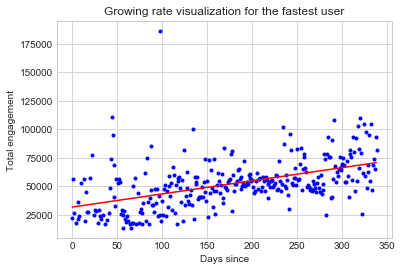

In [288]:
# Plot point and regression line
import matplotlib.pyplot as plt

plt.title('Growing rate visualization for the fastest user')
plt.xlabel('Days since')
plt.ylabel('Total engagement')
plt.plot(x1, y1, 'b.')
slope, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)
plt.plot(x1, slope * np.array(x1) + intercept, 'r-')
print("slope =", slope)

slope = 2.731612298914138


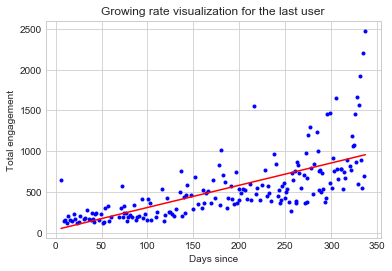

In [287]:
# Plot point and regression line
plt.title('Growing rate visualization for the last user')
plt.xlabel('Days since')
plt.ylabel('Total engagement')
plt.plot(x9, y9, 'b.')
slope, intercept, r_value, p_value, std_err = stats.linregress(x9, y9)
plt.plot(x9, slope * np.array(x9) + intercept, 'r-')
print("slope =", slope)

## Learning Models

In [68]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
# import data
features = pd.read_csv('data/user_features.csv')
users = pd.read_csv('data/user.csv')

In [70]:
features.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,user_id
0,1,1,0,1740115,38.637588,26,0,0.0000,0,2542,0,0.87499,154531
1,1,1,362,9803192,30.901522,11,237,1.7553,0,117,17,0.79306,156315
2,1,1,3279,3694516,45.933998,329,638,13.1270,0,1313,380,0.94425,149607
3,1,1,213,18185084,34.120554,162,65,2.4769,0,168,12,0.57251,26755
4,0,0,226,0,23.700552,3,99,5.0404,0,119,156,0.45718,149734


In [71]:
users.head()

,response,user_id
0,0,154531
1,0,156315
2,0,149607
3,0,26755
4,0,149734


In [72]:
# put togheter to have the final dataset
train = users.set_index('user_id').join(features.set_index('user_id'))

In [73]:
train.head()

,response,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12
user_id,,,,,,,,,,,,,
154531,0,1,1,0,1740115,38.637588,26,0,0.0000,0,2542,0,0.87499
156315,0,1,1,362,9803192,30.901522,11,237,1.7553,0,117,17,0.79306
149607,0,1,1,3279,3694516,45.933998,329,638,13.1270,0,1313,380,0.94425
26755,0,1,1,213,18185084,34.120554,162,65,2.4769,0,168,12,0.57251
149734,0,0,0,226,0,23.700552,3,99,5.0404,0,119,156,0.45718


## Exploratory Data Analysis 

The first and most important step for the analysis is to try to have a clear understanding of our data. In order to do this, we checked for missing values, controlled the _balance_ of the two sample of `response`, and took a closer look at the feautures.

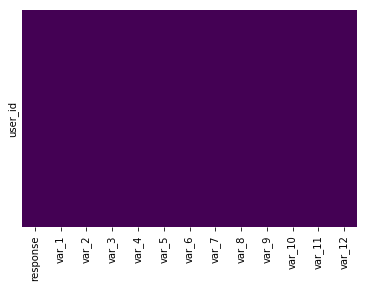

In [22]:
# Check for Missing Data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the above heatmap is clear that the dataset does not contain any null value. All the values in the dataset are numeric, so no operation on the features are needed up to this point.

It is important to check which is the ratio between the two classes of `response` in the dataset, to control if it is balanced or not.

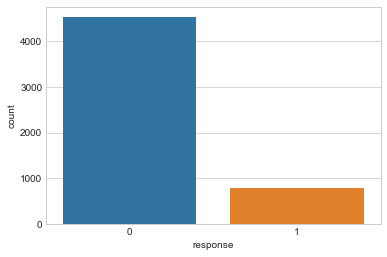

In [75]:
# Chek the percentage of outcome
sns.set_style('whitegrid')
sns.countplot(x='response',data=train)

In [76]:
# Calsculate the % of sample
train['response'].value_counts()

0    4516
1     801
Name: response, dtype: int64

The two classes of `response` are not equally rapresented. 82.3% of sample is 0 and only 17.7% is 1. This could affect the learning model. The predictive model could be biased and inaccurate because the second class is poor represented.

## A closer look at the features

`Vars_1` and `var_2` are categorical variables (0,1), no continuos values. So we could take a look at their relation with the outcome `response` in order to check if they are strong predictor or not. 
In the _histograms_ below we plotted the `response` variable using color to distinguish the values 0 or 1 in `var_1` and `var_2` variables respectively.

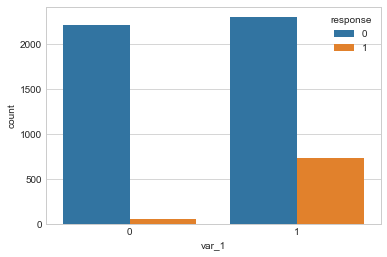

In [289]:
# Check if var_1 is a strong predictior or not
sns.set_style('whitegrid')
sns.countplot(x='var_1',hue='response', data=train)

As you can see, almost all the values of `response = 1` are contained in `var_1 = 1`. In other words, we can be pretty confident that when `var_1` is 0, the probability to get a `response = 1` is very poor. This is certainly a property that our classifier will take advantage of. 

A similar behaviour is observed in `var_2` (see plot below).

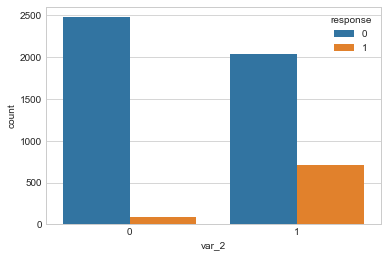

In [290]:
# Check if var_2 is a strong predictior or not
sns.set_style('whitegrid')
sns.countplot(x='var_2',hue='response', data=train)

Let's take a look to the other variables distribution and their possible correlations. In fact, not having self-explaining names, we do not know what they are and how they could be related to the outcome and between them.

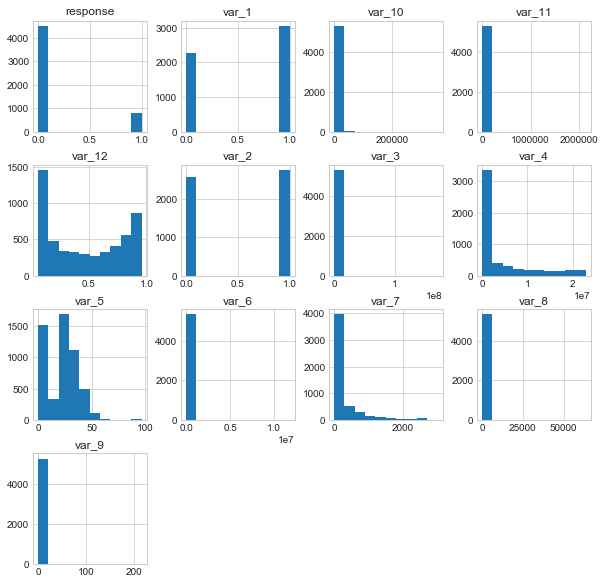

In [80]:
# Features plots
train.hist(figsize=(10,10));

From the above distributions it is clear that variables `var_3`, `var_4`, `var_6`, `var_8`, `var_9`, `var_10` and `var_11` present lot of outliers and span multiple order of magnitude.
So we could take the logaritimc value and than chek for possible correlations.

## Taking logaritmic value of some features

In order to apply the logaritmic transformation to misbehaving features we created a proper function: `log_transform`, that takes as input the dataset, and the list of variable to transform, and returns the modified data frame.

In [82]:
# Define a function to apply log to a list of variables
def log_transform(df, var_list):
    for var in var_list:
        df[var] = df[var].apply(lambda x: np.log10(x+1))

In [83]:
# apply the func
log_transform(train, ['var_3','var_4','var_6','var_8','var_9','var_10','var_11'])

Now we could chek for possible correlations visually and than, after that, take a look at the Person coefficient to have a numerical estimation of the correlation.

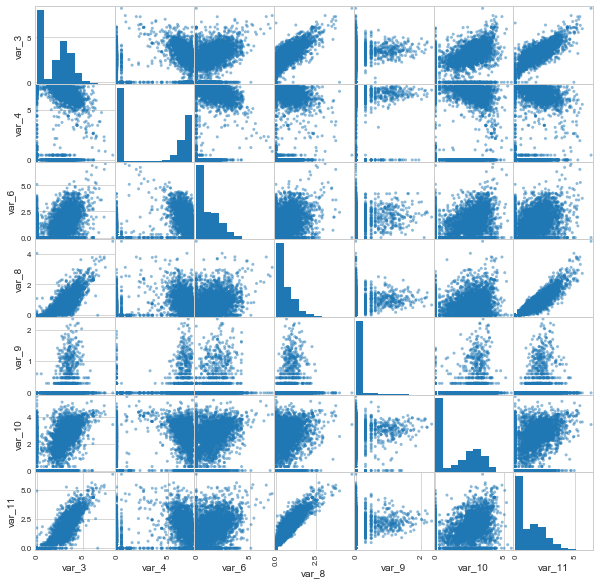

In [84]:
# check the correlation
pd.plotting.scatter_matrix(train[['var_3','var_4','var_6', 'var_8','var_9', 'var_10', 'var_11']], figsize=(10, 10))
plt.show()

From the above scatter plots it appear that with the exception of `var_9`, the other features seems to be all correlated with different intensity. For `var_8` and `var_11` the correlation is really strong. They are also correlated with `var_3`.
We have checked also the Person coefficient to have a numeric estimation of the correlation.

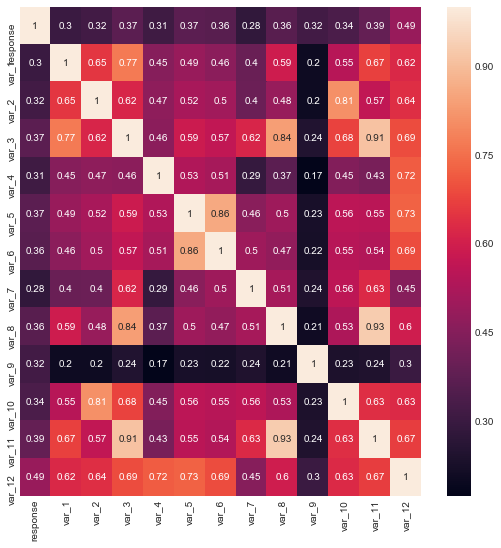

In [85]:
# check the perasons coefficients
corr_matrix = train.corr()
#corr_matrix
# plot the heatmap
plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

So, from the above heatmap appears also some correlation between _normal_ features and _misbehaving_. For example, `var_5` and `var_6`, `var_10` and `var_2`. Furthemore, `var_4` seems to be _anticorrelated_ with `var_3`, and slightly also with `var_6` and `var_8`. So we decide to try to use only a subsample of features to train the learnig model.

## Support Vector Machine Classifier (SVM)

As first attempt to model our dataset, we build a SVM classifier using only a subset of features.
So first of all, we selected the features.

In [176]:
# Subsetting the train dataset
trainmod = train[['response','var_1','var_2','var_5','var_7','var_12']]
trainmod.head()

,response,var_1,var_2,var_5,var_7,var_12
user_id,,,,,,
154531,0,1,1,38.637588,0,0.87499
156315,0,1,1,30.901522,237,0.79306
149607,0,1,1,45.933998,638,0.94425
26755,0,1,1,34.120554,65,0.57251
149734,0,0,0,23.700552,99,0.45718


Un important step in the building and training our model is to divide our datset in a train and a test sample. So we could use the test sample to evaluate the model performances.

In [190]:
# Split the dataset in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainmod.drop('response',axis=1), 
                                                    trainmod['response'], test_size=0.30, 
                                                    random_state=101)

### Features Scaling

In order to have better results from the **SVM** classifier we need to rescale our features.

In [191]:
# Features rescaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

### Build the classifier

Now we are ready to build the classifier. We used the `class_weight='balanced'` parameter to try to taking into account the bad balance of our dataset, where the _class_ 0 is the most represented.

In [179]:
# Buiding the classifier
from sklearn.svm import SVC
svc_model = SVC(class_weight='balanced')

In [180]:
# Model fit
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [181]:
# Model predictions
svc_pred = svc_model.predict(X_test)

### Model evaluation

Finally we need to evaluate our model in order to estimate his performances. We could take a look at the **_Confusion Matrix_** and at some estimators like **_accurancy_**, **_precision_**, **_recal_** and **_F1-score_**.

Confusion matrix, without normalization
[[1043  281]
 [  43  229]]
Normalized confusion matrix
[[0.79 0.21]
 [0.16 0.84]]


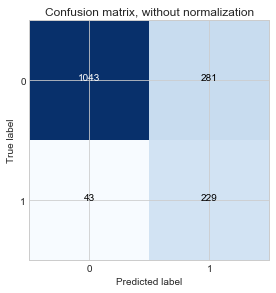

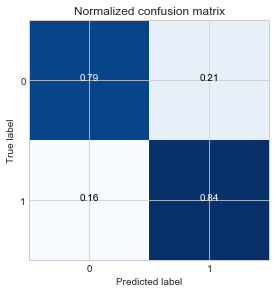

             precision    recall  f1-score   support

          0       0.96      0.79      0.87      1324
          1       0.45      0.84      0.59       272

avg / total       0.87      0.80      0.82      1596



In [182]:
# Model eveluation
import itertools
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,svc_pred)
np.set_printoptions(precision=2)

class_names = ['0', '1']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
#accurancy = float(cnf_matrix[0][0] + cnf_matrix[1][1])/cnf_matrix.sum()
#print(accurancy)
print(classification_report(y_test,svc_pred))

With the **SVM** classifier we obtained a ***_True Positive Rate_*** (**_Recall_** or **_Sensitivity_**) of 79% for `response` class 0 and 84% for `response` class 1. Those values are not so high, but correclty balanced, taking into account the different weight of the two samples.  

## Random Forest Classifier

In order to try to obtain a better classification for our dataset, we builded also a **Random Forest classifier**, with the same subset of features.

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced', n_estimators=101)

In [96]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=101, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [97]:
rfc_pred = rfc.predict(X_test)

Confusion matrix, without normalization
[[1266   58]
 [ 151  121]]
Normalized confusion matrix
[[0.96 0.04]
 [0.56 0.44]]


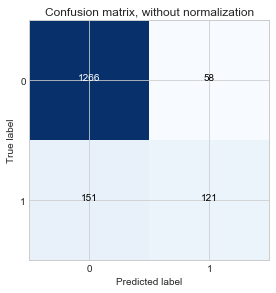

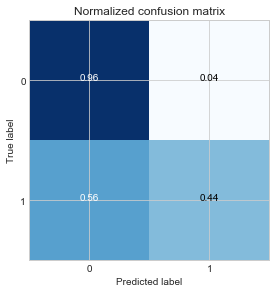

             precision    recall  f1-score   support

          0       0.89      0.96      0.92      1324
          1       0.68      0.44      0.54       272

avg / total       0.86      0.87      0.86      1596



In [117]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rfc_pred)
np.set_printoptions(precision=2)

class_names = ['0', '1']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
#accurancy = float(cnf_matrix[0][0] + cnf_matrix[1][1])/cnf_matrix.sum()
#print(accurancy)
print(classification_report(y_test,rfc_pred))

Using the **Random Forest** classifier the **_sensitivity_** for `response` 0 is quite better than the results of the **SVM**, respectively 96% and 79%. But for `response` 1 the **_True Positive Rate_** is very bad, 44% versus 84% with **SVM** classifier.
So, we could say that the **Support Vector Machine** represents a good model to fit our dataset, and we will use it for _predictions_ of new data.

## Data Cleaning and Features Transformation

As last step of our analysis we tryied to re-apply the learning model using all the features in order to check if the algorithm performances became better. 
But, to be useful, `var_3`, `var_4`, `var_6`, `var_9` and `var_10` need to be cleaned. 
Following plots show a closer look at those _critical_ variables. We cutted the outliers values and took the logaritmic values in order to reduce the number of order of magnitude spanned from the variables.

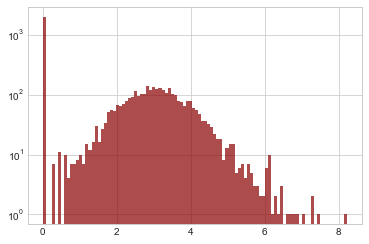

In [118]:
# Plot var_3
train['var_3'].hist(bins=100,color='darkred',alpha=0.7, log=True)

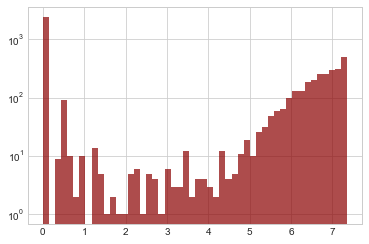

In [119]:
train['var_4'].hist(bins=50,alpha=0.7,color='darkred',log=True)

It seams all the values of `var_4` are concentraded  at 0 and than there is a very long tail. 

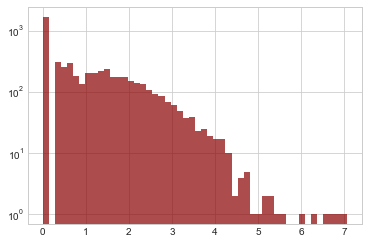

In [120]:
train['var_6'].hist(bins=50,color='darkred',alpha=0.7, log=True)

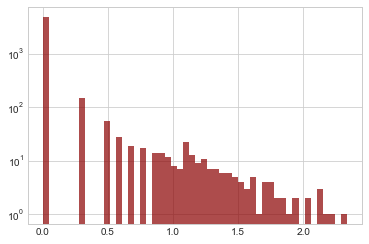

In [121]:
train['var_9'].hist(bins=50,color='darkred',alpha=0.7, log=True)

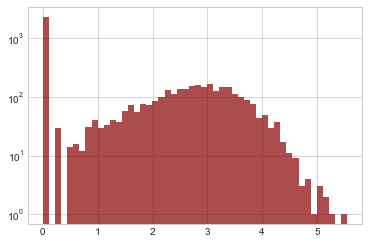

In [122]:
train['var_10'].hist(bins=50,color='darkred',alpha=0.7, log=True)

## Training SVM model after data cleaning

After features transformation, we applyied the **SVM** classifier with the complete list of features, removing only features higly correlated: `var_4`, `var_8` and `var_11`.

In [233]:
# Subsetting the train dataset
new_trainmod = train[['response','var_1','var_2', 'var_3','var_5', 'var_6','var_7', 'var_9', 'var_10','var_12']]

In [234]:
# Split samples
X_train, X_test, y_train, y_test = train_test_split(new_trainmod.drop('response',axis=1), 
                                                    new_trainmod['response'], test_size=0.30, 
                                                    random_state=101)

In [235]:
# Rescaling features
newscaler = StandardScaler()
newscaler.fit(X_train)
X_train = newscaler.transform(X_train)
X_test = newscaler.transform(X_test)

In [236]:
# Model fit
svc_new_model = SVC(class_weight='balanced')
svc_new_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [237]:
# Model predictions
svc_new_pred = svc_new_model.predict(X_test)

Confusion matrix, without normalization
[[1046  278]
 [  44  228]]
Normalized confusion matrix
[[0.79 0.21]
 [0.16 0.84]]


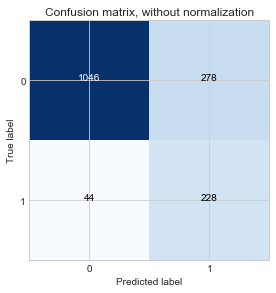

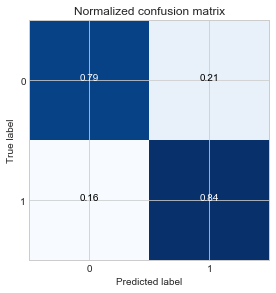

             precision    recall  f1-score   support

          0       0.96      0.79      0.87      1324
          1       0.45      0.84      0.59       272

avg / total       0.87      0.80      0.82      1596



In [238]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, svc_new_pred)
np.set_printoptions(precision=2)

class_names = ['0', '1']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
#accurancy = float(cnf_matrix[0][0] + cnf_matrix[1][1])/cnf_matrix.sum()
#print(accurancy)
print(classification_report(y_test,svc_new_pred))

New results are completely comparable with the model builded and trained with only the subset of the features. The inclusion of the other features did not improved the performances of the learning algorithm, as aspected. 
Indeed, even after the _logarithimc_ transformation most part of the features values are concentrated at zero, suppressing the weight of the other values. 
Unfortunatly we cannot remove those _sparks_ at zero from the dataset without loosing the most part of it. We tried and we obtained only few hundreds of data, quite unuseful to build and train whatever learning model.

In search of better performances, we also used **GridSearch** to try to optimize the paramenters _C_ and _gamma_ of the **SVM** models, but with the option _class_weight='balanced'_ GridSearchCV diverged resulting in a totally wrong classification.

## New data classification with SVM algorithm

At this point we will use the trained **SVM** model to predict the `response` on a new dataset. 
First of all, we need to import the new data in a Pandas dataframe and apply all the transformation we did on training sample.

In [199]:
# Import data
test = pd.read_csv('data/model_test_file.csv')
test.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,user_id
0,1,1,193,11248797,33.254023,17,40,77.7500,0,583,3055,0.60563,154472
1,1,1,14631,2396429,42.681445,1005,1582,56.3211,0,4082,53187,0.88451,151147
2,1,1,385,3521953,33.501102,294,105,8.4952,26,162,37,0.86154,10543
3,0,0,0,0,0.000000,0,0,0.0000,0,0,0,0.10018,136986
4,1,1,6672,2913930,34.344784,10582,30,0.7667,0,133,7,0.68598,137008


We need to remove same features as in the training analysis that results in a better performances. So we exclude `var_3`, `var_4`, `var_6`, `var_8`, `var_9`, `var_10` and `var_11`.

In [200]:
# Drop misbehaving features
#test.drop(['var_3', 'var_4','var_6','var_8','var_9','var_10','var_11','user_id'],axis=1,inplace=True)
testmod = test.drop(['var_3', 'var_4','var_6','var_8','var_9','var_10','var_11'],axis=1)
# Set user_id as index
testmod = testmod.set_index('user_id')
testmod.head()

,var_1,var_2,var_5,var_7,var_12
user_id,,,,,
154472,1,1,33.254023,40,0.60563
151147,1,1,42.681445,1582,0.88451
10543,1,1,33.501102,105,0.86154
136986,0,0,0.000000,0,0.10018
137008,1,1,34.344784,30,0.68598


Now, we need to _reshape_ a bit the data frame to have the right format for the learning model.

In [202]:
# Reshaping
X_test_newsample = testmod.as_matrix()

Now we are ready to apply the **SVM** model we builded and trained with only the _good_ features. 
But firt we have to _rescale_ also the new test data.

In [203]:
# rescaling
X_test_newsample = scaler.transform(X_test_newsample)

The predictions of our **SVM** learning model are:

In [204]:
# apply SVM
svc_new_pred = svc_model.predict(X_test_newsample)

In [208]:
# see the results taking a look at the predictions created
testmod['new_pred'] = svc_new_pred
testmod

,var_1,var_2,var_5,var_7,var_12,new_pred
user_id,,,,,,
154472,1,1,33.254023,40,0.60563,0
151147,1,1,42.681445,1582,0.88451,1
10543,1,1,33.501102,105,0.86154,1
136986,0,0,0.000000,0,0.10018,0
137008,1,1,34.344784,30,0.68598,0
137059,0,0,0.000000,0,0.08061,0
137253,0,0,0.000000,0,0.08061,0
137323,1,1,29.925298,20,0.77864,1
171652,1,1,0.000000,1810,0.67349,0
